In [18]:
import USA_oil_data as oil
import pandas as pd
from FRED_oil_data import get_fred_data
import matplotlib.pyplot as plt

In [19]:
wti = get_fred_data("POILWTIUSDM")
vol = get_fred_data("OVXCLS")
dubai = get_fred_data("POILDUBUSDM")

In [3]:
production = oil.mbbl_production()
crude_stocks = oil.crude_oil_stocks()
nonprod_reserves = oil.proved_nonprod_reserves()
imports, exports = oil.imports_exports()

<AxesSubplot:xlabel='period'>

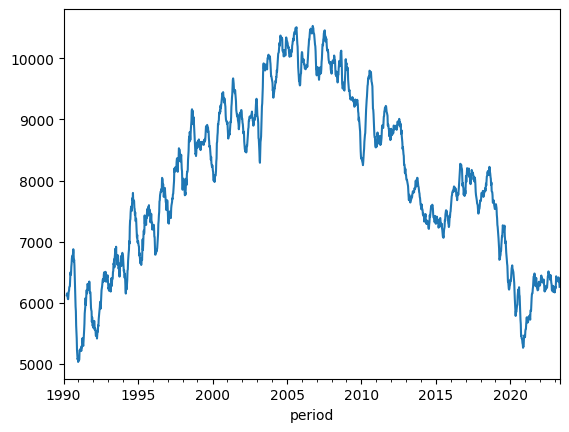

In [4]:
imports = imports.groupby('period').sum()
imports.rolling(12).mean().plot.line()

<AxesSubplot:xlabel='period'>

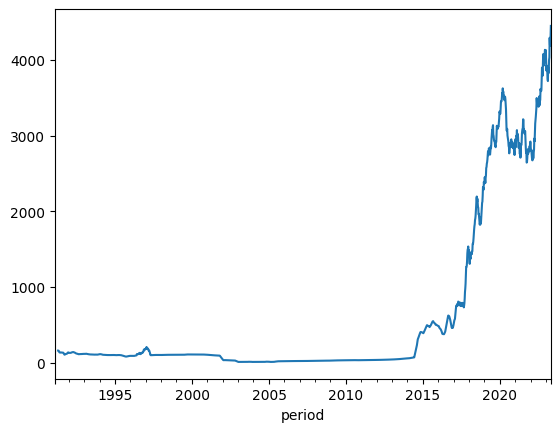

In [5]:
exports = exports.groupby('period').sum()
exports.rolling(12).mean().plot.line()

In [6]:
imports = imports.rename('imports')
exports = exports.rename('exports')

In [7]:
merged_df = pd.merge(imports, exports, on='period')

In [8]:
merged_df['diff'] = merged_df['imports'] - merged_df['exports']

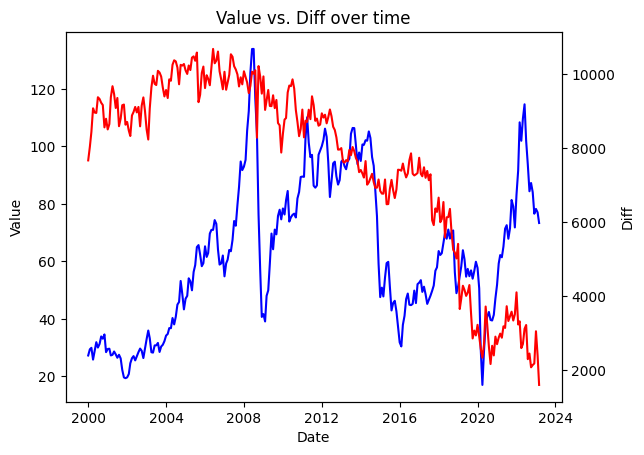

In [9]:
merged_df['date'] = merged_df.index.strftime('%Y-%m')
wti['date'] = wti.index
wti['date'] = wti['date'].apply(lambda x: x[:-3])
wti['date'] = pd.to_datetime(wti['date'])
merged_df['date'] = pd.to_datetime(merged_df['date'])

wti = wti.set_index('date')
merged_df = merged_df.set_index('date')

merged_df = merged_df['diff']
wti_diff = pd.merge(wti, merged_df, on='date').groupby('date').mean()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot the 'value' line on the first axis
ax1.plot(wti_diff.index, wti_diff['value'], color='blue')
ax1.set_ylabel('Value')

# plot the 'diff' line on the second axis
ax2.plot(wti_diff.index, wti_diff['diff'], color='red')
ax2.set_ylabel('Diff')

# set the x-axis label
ax1.set_xlabel('Date')

# set the title
plt.title('Value vs. Diff over time')

# show the plot
plt.show()

In [10]:
corr_matrix = wti_diff.corr()
corr_matrix

,value,diff
value,1.00000,-0.07363
diff,-0.07363,1.00000


<AxesSubplot:xlabel='date'>

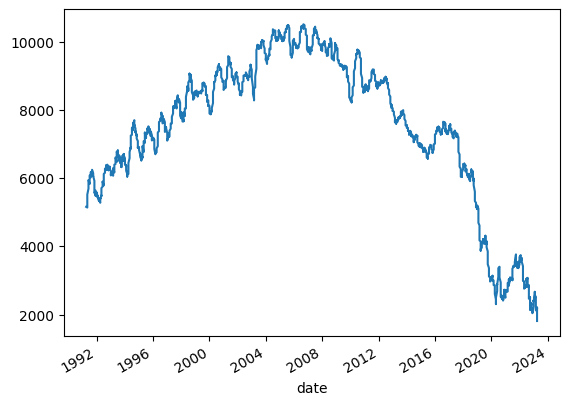

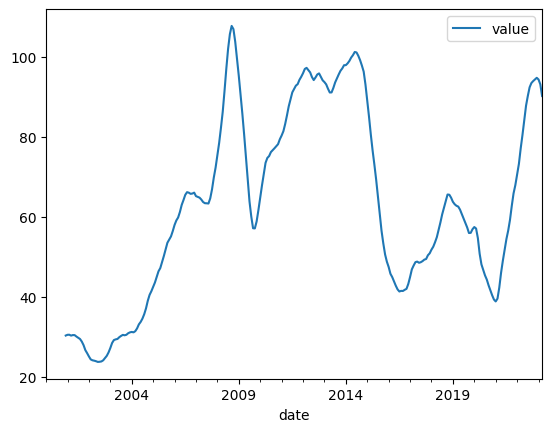

In [11]:
merged_df.rolling(12).mean().plot.line()
wti.rolling(12).mean().plot.line()

<AxesSubplot:xlabel='date'>

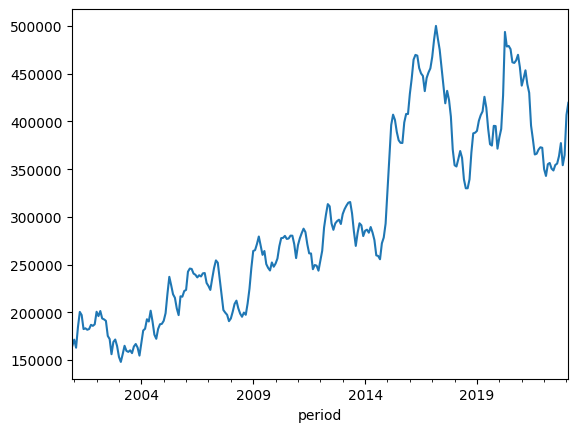

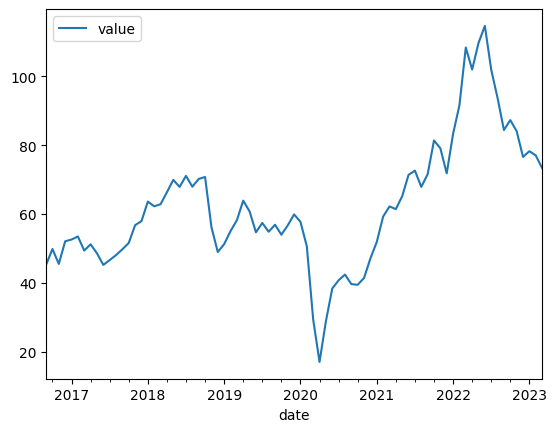

In [12]:
crude_stocks.plot.line()
wti['2016-09-01':].plot.line()

<AxesSubplot:xlabel='period'>

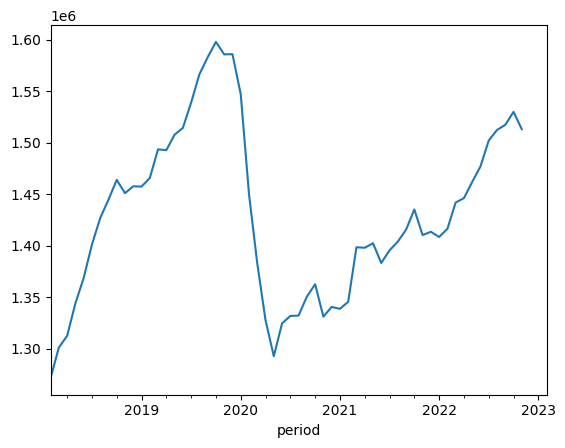

In [13]:
production.rolling(4).mean().plot.line()

<AxesSubplot:xlabel='date'>

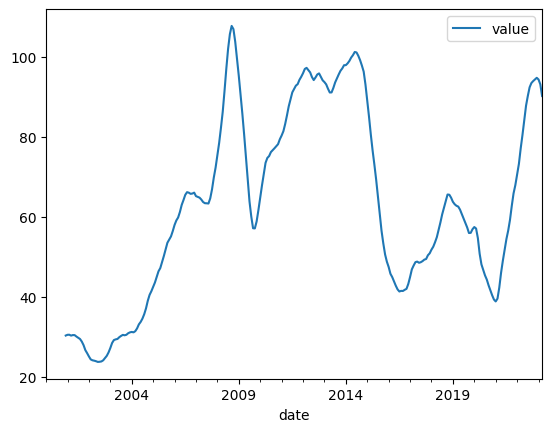

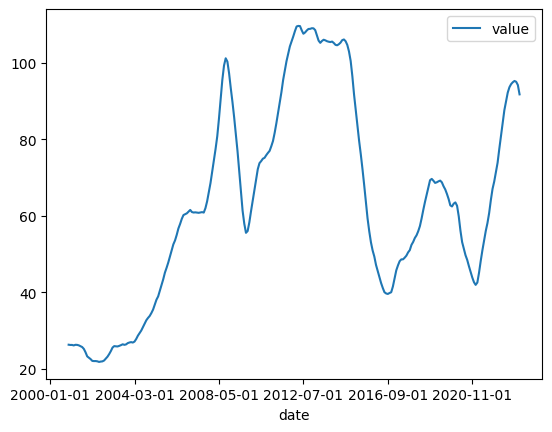

In [14]:
wti.rolling(12).mean().plot.line()
dubai.rolling(12).mean().plot.line()

In [15]:
dubai.index = pd.to_datetime(dubai.index)
wti_dub = pd.merge(wti, dubai, on='date')

In [16]:
wti_dub['wti - dubai'] = wti_dub['value_x'] - wti_dub['value_y']


<AxesSubplot:xlabel='date'>

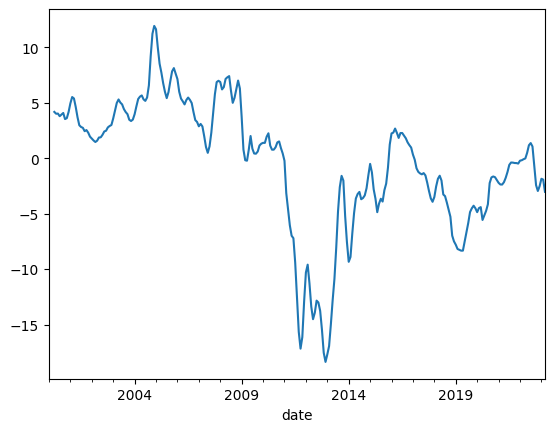

In [17]:
wti_dub['wti - dubai'].rolling(4).mean().plot.line()

In [2]:
data = oil.mbbl_production(years=10)
data

,barrels
period,
2013-01-01,894731.0
2013-02-01,861563.0
2013-03-01,912784.0
2013-04-01,916288.0
2013-05-01,925234.0
...,...
2022-10-01,1541371.0
2022-11-01,1512246.0
2022-12-01,1509347.0


<AxesSubplot:xlabel='period'>

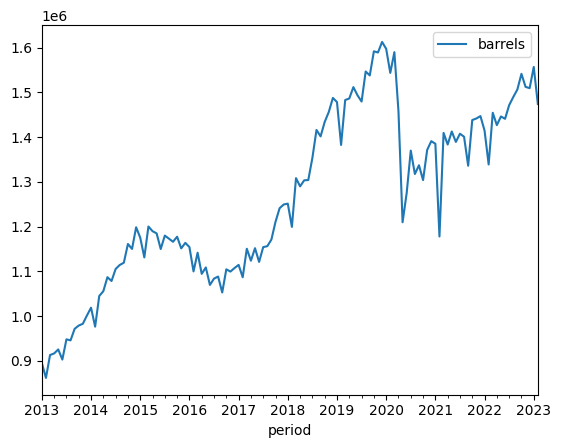

In [6]:
data.plot.line()

In [2]:
data = oil.weekly_product_supplied()

<AxesSubplot:xlabel='period'>

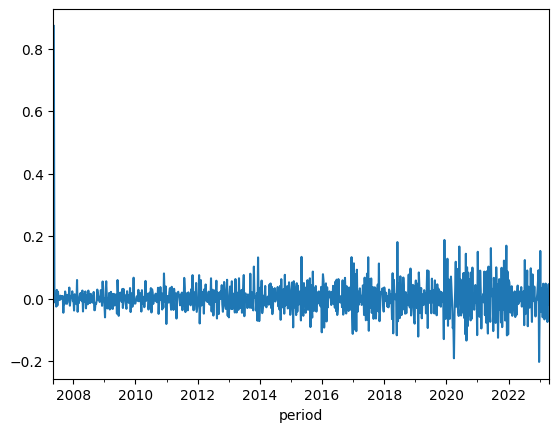

In [14]:
change = data.pct_change(-1)
change.plot()